### Laplace transform

\begin{equation*}
    \mathcal{L}\{f(t)\} (s) = \int_0^\infty e^{-st} f(t)\, dt
\end{equation*}

\begin{equation*}
    \mathcal{L}^{-1}\{F(s)\} (t) = \frac{1}{2\pi \, i} \int_{\gamma - i\infty}^{\gamma + i\infty} e^{st} F(s)\, ds
\end{equation*}

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Defining general symbols
t = smp.symbols("t", real = True, nonnegative = True)
s = smp.symbols("s", complex = True)
alpha, C, omega, A, B, phi = smp.symbols("alpha, C, omega, A, B, phi", real = True, nonzero = True, constant = True)

**The poles of the Laplace transform of a function have physical significance. Let’s look at some basic transforms**

<p style="text-align: center;">
    <img src="https://media.cheggcdn.com/media/1fb/1fb8ed68-fce1-44c6-8551-546c0e33fc0e/php9jFbJH" alt="Stability" style="max-width: 100%;">
</p>

In [3]:
# Costant signal
smp.laplace_transform(C, t, s, noconds = True)

C/s

**For a constant signal, there is always a pole at the origin**

In [4]:
# Divergent signal
smp.laplace_transform(C * smp.exp(alpha * t), t, s, noconds = True)

C/(-alpha + s)

In [5]:
# Convergent signal
smp.laplace_transform(C * smp.exp(- alpha * t), t, s, noconds = True)

C/(alpha + s)

**For a signal that increases over time (unstable), there is a pole with a positive real part, while for a signal that decreases over time until it reaches zero (stable), there is a pole with a negative real part**

In [6]:
# Oscillating signal - Linear combination
smp.laplace_transform(A * smp.sin(omega * t) + B * smp.cos(omega * t), t, s, noconds = True)

A*omega/(omega**2 + s**2) + B*s/(omega**2 + s**2)

In [7]:
# Oscillating signal - Phase
smp.laplace_transform(A * smp.sin(omega * t + phi), t, s, noconds = True)

A*(omega*cos(phi) + s*cos(phi - pi/2))/(omega**2 + s**2)

**For a signal that oscillates stably, the poles are located directly on the imaginary axis of $s$**

**Let’s apply the Laplace transform method to solve the differential equation of an RLC circuit, in series or parallel. Given an input voltage, the current is given by:**

\begin{equation*}
    I(t) =  \mathcal{L}^{-1} \left( \frac{\tilde{V}(s)}{s^2 + 2 \beta s + \omega_0^2} \right)
\end{equation*}

In [8]:
# RLC symbols
R, L, C, beta, omega, V0, tau, omega0 = smp.symbols("R, L, C, beta, omega, V0, tau, omega0", real = True, positive = True, constant = True)

In [9]:
# Defining the voltage
V = V0 * smp.exp(- t / tau) * (smp.cos(omega * t) * smp.sin(omega * t))
V

V0*exp(-t/tau)*sin(omega*t)*cos(omega*t)

In [10]:
# Getting V(s)
V_laplace = smp.laplace_transform(V, t, s, noconds = True).factor()
V_laplace

V0*omega*tau**2/(4*omega**2*tau**2 + s**2*tau**2 + 2*s*tau + 1)

**Let’s calculate the poles of the Laplace transform of V**

In [11]:
smp.solve((2 * omega * tau) ** 2 + (s * tau) ** 2 + 2 * s * tau + 1, s, dict = True)

[{s: -2*I*omega - 1/tau}, {s: 2*I*omega - 1/tau}]

**As can be seen, the poles are complex conjugate numbers with non-trivial real and imaginary parts. In particular, the real part is negative, indicating that the transformed signal is decreasing over time, while the imaginary parts indicate that the signal has an oscillatory character**

In [12]:
# Getting i(s)
i_laplace = (V_laplace / (s ** 2 + 2 * beta * s + omega0 ** 2)).factor()
i_laplace

V0*omega*tau**2/((2*beta*s + omega0**2 + s**2)*(4*omega**2*tau**2 + s**2*tau**2 + 2*s*tau + 1))

**Let's calculate the poles again**

In [13]:
smp.solve(2 * beta * s + omega0 ** 2 + s ** 2, s, dict = True)

[{s: -beta - sqrt(beta**2 - omega0**2)},
 {s: -beta + sqrt(beta**2 - omega0**2)}]

**Using the condition $\beta ^ 2 < \omega _ 0 ^ 2$ we get complex conjugate numbers as before**

In [14]:
# Getting i(t), general current
i = smp.inverse_laplace_transform(i_laplace, s, t).simplify()
i

V0*tau**2*(2*omega*(2*tau*sqrt(-beta**2 + omega0**2)*(beta*tau - 1)*cos(t*sqrt(-beta**2 + omega0**2)) + (4*beta**2*tau**2 - 2*beta*tau*(beta*tau - 1) - 4*beta*tau + 4*omega**2*tau**2 - omega0**2*tau**2 + 1)*sin(t*sqrt(-beta**2 + omega0**2)))*exp(t/tau) - sqrt(-beta**2 + omega0**2)*(4*omega*tau*(beta*tau - 1)*cos(2*omega*t) + (2*beta*tau + 4*omega**2*tau**2 - omega0**2*tau**2 - 1)*sin(2*omega*t))*exp(beta*t))*exp(t*(beta - 2*(beta*tau + 1)/tau + 1/tau))*Heaviside(t)/(2*sqrt(-beta**2 + omega0**2)*(16*beta**2*omega**2*tau**4 + 4*beta**2*tau**2 - 16*beta*omega**2*tau**3 - 4*beta*omega0**2*tau**3 - 4*beta*tau + 16*omega**4*tau**4 - 8*omega**2*omega0**2*tau**4 + 8*omega**2*tau**2 + omega0**4*tau**4 + 2*omega0**2*tau**2 + 1))

In [15]:
# Importing libraries for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [16]:
# dictionary with numerical values for the parameters
Rv = 1
Lv = 0.1
Cv = 0.01
betav = Rv / (2 * Lv)
omegav = 5
V0v = 2
tauv = 0.5
omega0v = 1 / np.sqrt(Lv * Cv)

params = {
    R: Rv,
    L: Lv,
    C: Cv,
    beta: betav,
    omega: omegav,
    V0: V0v,
    tau: tauv,
    omega0: omega0v
}

In [17]:
# Going numeric
i = smp.lambdify(t, i.subs(params), "numpy")
i_laplace = smp.lambdify(s, i_laplace.subs(params), "numpy")

V = smp.lambdify(t, V.subs(params), "numpy")
V_laplace = smp.lambdify(s, V_laplace.subs(params), "numpy")

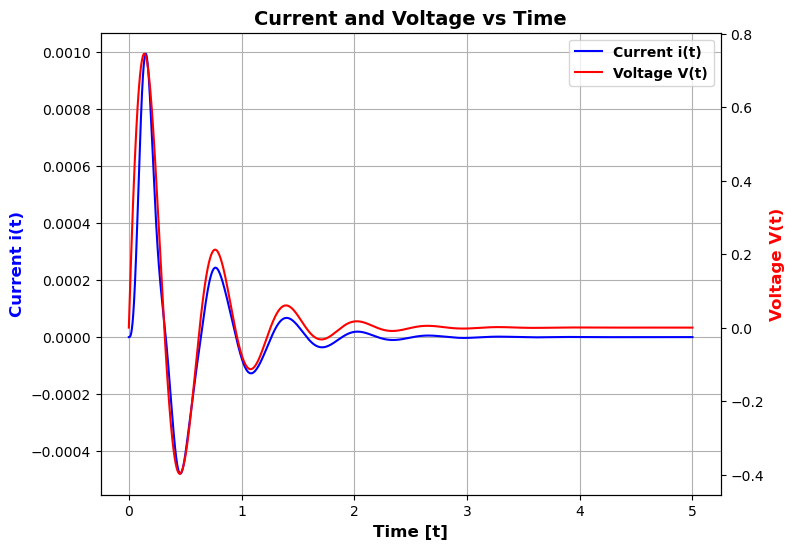

In [18]:
# Plotting the qualitative trend
t = np.linspace(0, 5, 5000)

fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.plot(t, i(t).real, label = "Current i(t)", color = "blue")
ax1.set_title("Current and Voltage vs Time", fontsize = 14, fontweight = "bold")
ax1.set_xlabel("Time [t]", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("Current i(t)", fontsize = 12, fontweight = "bold", color = "blue")
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(t, V(t), label = "Voltage V(t)", color = "red")
ax2.set_ylabel("Voltage V(t)", fontsize = 12, fontweight = "bold", color = "red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc = "upper right", prop = FontProperties(weight = "bold"))

plt.show()

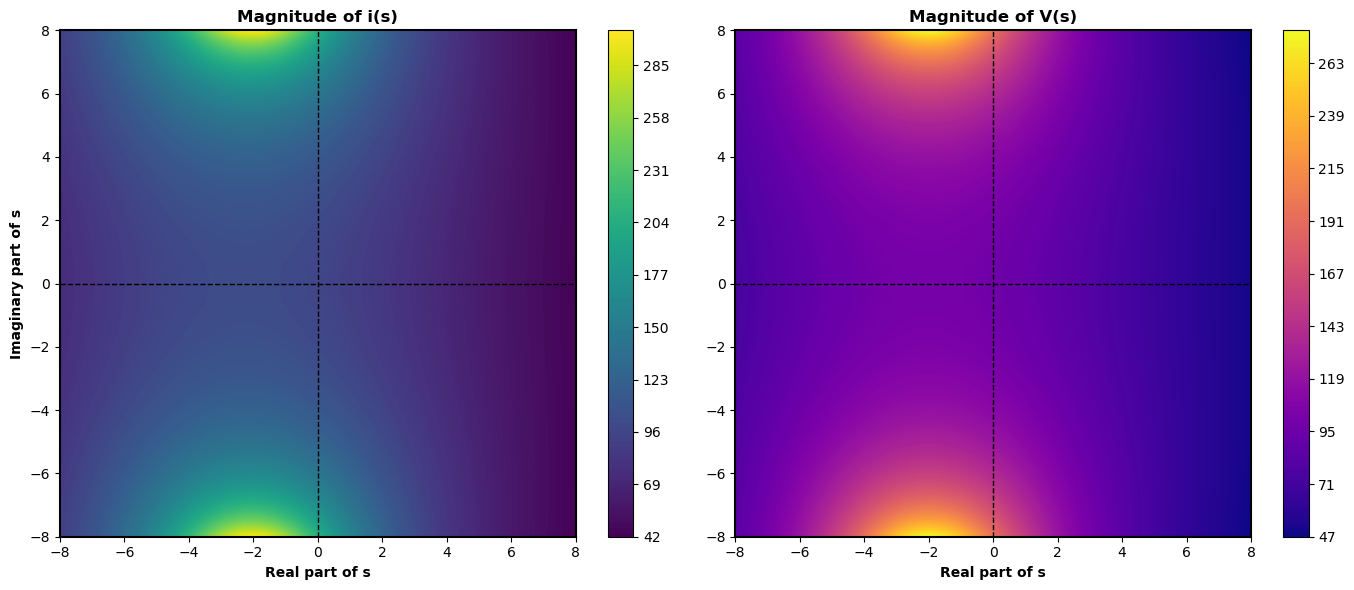

In [19]:
# Plotting the Laplace transforms
real = np.linspace(- 8, 8, 500)  # Real axis (sigma)
imag = np.linspace(- 8, 8, 500)  # Imaginary axis (omega)
real, imag = np.meshgrid(real, imag)

s = real + 1j * imag
I_laplace_magnitude = np.abs(i_laplace(s)) * 1e+06 
V_laplace_magnitude = np.abs(V_laplace(s)) * 1e+03 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

contour1 = ax1.contourf(real, imag, I_laplace_magnitude, levels = 200, cmap = "viridis")
fig.colorbar(contour1, ax = ax1) 
ax1.set_title("Magnitude of i(s)", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Real part of s", fontsize = 10, fontweight = "bold")
ax1.set_ylabel("Imaginary part of s", fontsize = 10, fontweight = "bold")
ax1.axhline(0, color = "black", linewidth = 1, linestyle = "--")
ax1.axvline(0, color = "black", linewidth = 1, linestyle = "--")

contour2 = ax2.contourf(real, imag, V_laplace_magnitude, levels = 250, cmap= "plasma")
fig.colorbar(contour2, ax = ax2) 
ax2.set_title("Magnitude of V(s)", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("Real part of s", fontsize = 10, fontweight = "bold")
ax2.axhline(0, color = "black", linewidth = 1, linestyle = "--")
ax2.axvline(0, color = "black", linewidth = 1, linestyle = "--")

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()